In [1]:
%matplotlib inline


***********
Usage Guide
***********

This tutorial covers some basic usage patterns and best-practices to
help you get started with Matplotlib.


In [2]:
import matplotlib.pyplot as plt
import numpy as np

A simple example
================

Matplotlib graphs your data on `~.figure.Figure`\s (i.e., windows, Jupyter
widgets, etc.), each of which can contain one or more `~.axes.Axes` (i.e., an
area where points can be specified in terms of x-y coordinates (or theta-r
in a polar plot, or x-y-z in a 3D plot, etc.).  The most simple way of
creating a figure with an axes is using `.pyplot.subplots`. We can then use
`.Axes.plot` to draw some data on the axes:



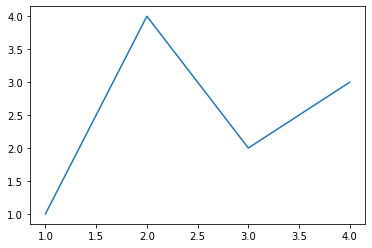

In [3]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot([1, 2, 3, 4], [1, 4, 2, 3])  # Plot some data on the axes.

Many other plotting libraries or languages do not require you to explicitly
create an axes.  For example, in MATLAB, one can just do

.. code-block:: matlab

   plot([1, 2, 3, 4], [1, 4, 2, 3])  % MATLAB plot.

and get the desired graph.

In fact, you can do the same in Matplotlib: for each `~.axes.Axes` graphing
method, there is a corresponding function in the :mod:`matplotlib.pyplot`
module that performs that plot on the "current" axes, creating that axes (and
its parent figure) if they don't exist yet.  So the previous example can be
written more shortly as



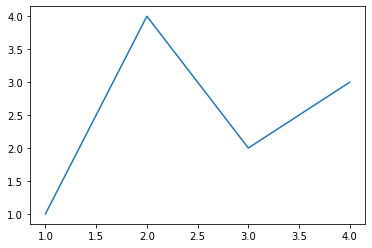

In [4]:
plt.plot([1, 2, 3, 4], [1, 4, 2, 3])  # Matplotlib plot.


Parts of a Figure
=================

Now, let's have a deeper look at the components of a Matplotlib figure.

![](../../_static/anatomy.png)


:class:`~matplotlib.figure.Figure`
----------------------------------

The **whole** figure.  The figure keeps
track of all the child :class:`~matplotlib.axes.Axes`, a smattering of
'special' artists (titles, figure legends, etc), and the **canvas**.
(Don't worry too much about the canvas, it is crucial as it is the
object that actually does the drawing to get you your plot, but as the
user it is more-or-less invisible to you).  A figure can contain any
number of :class:`~matplotlib.axes.Axes`, but will typically have
at least one.

The easiest way to create a new figure is with pyplot::

   fig = plt.figure()  # an empty figure with no Axes
   fig, ax = plt.subplots()  # a figure with a single Axes
   fig, axs = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes

It's convenient to create the axes together with the figure, but you can
also add axes later on, allowing for more complex axes layouts.

:class:`~matplotlib.axes.Axes`
------------------------------

This is what you think of as 'a plot', it is the region of the image
with the data space. A given figure
can contain many Axes, but a given :class:`~matplotlib.axes.Axes`
object can only be in one :class:`~matplotlib.figure.Figure`.  The
Axes contains two (or three in the case of 3D)
:class:`~matplotlib.axis.Axis` objects (be aware of the difference
between **Axes** and **Axis**) which take care of the data limits (the
data limits can also be controlled via the :meth:`.axes.Axes.set_xlim` and
:meth:`.axes.Axes.set_ylim` methods).  Each :class:`~.axes.Axes` has a title
(set via :meth:`~matplotlib.axes.Axes.set_title`), an x-label (set via
:meth:`~matplotlib.axes.Axes.set_xlabel`), and a y-label set via
:meth:`~matplotlib.axes.Axes.set_ylabel`).

The :class:`~.axes.Axes` class and its member functions are the primary entry
point to working with the OO interface.

:class:`~matplotlib.axis.Axis`
------------------------------

These are the number-line-like objects. They take
care of setting the graph limits and generating the ticks (the marks
on the axis) and ticklabels (strings labeling the ticks).  The location of
the ticks is determined by a `~matplotlib.ticker.Locator` object and the
ticklabel strings are formatted by a `~matplotlib.ticker.Formatter`.  The
combination of the correct `.Locator` and `.Formatter` gives very fine
control over the tick locations and labels.

:class:`~matplotlib.artist.Artist`
----------------------------------

Basically everything you can see on the figure is an artist (even the
`.Figure`, `Axes <.axes.Axes>`, and `~.axis.Axis` objects).  This includes
`.Text` objects, `.Line2D` objects, :mod:`.collections` objects, `.Patch`
objects ... (you get the idea).  When the figure is rendered, all of the
artists are drawn to the **canvas**.  Most Artists are tied to an Axes; such
an Artist cannot be shared by multiple Axes, or moved from one to another.


Types of inputs to plotting functions
=====================================

All of plotting functions expect `numpy.array` or `numpy.ma.masked_array` as
input.  Classes that are 'array-like' such as `pandas` data objects
and `numpy.matrix` may or may not work as intended.  It is best to
convert these to `numpy.array` objects prior to plotting.

For example, to convert a `pandas.DataFrame` ::

  a = pandas.DataFrame(np.random.rand(4, 5), columns = list('abcde'))
  a_asarray = a.values

and to convert a `numpy.matrix` ::

  b = np.matrix([[1, 2], [3, 4]])
  b_asarray = np.asarray(b)


The object-oriented interface and the pyplot interface
======================================================

As noted above, there are essentially two ways to use Matplotlib:

- Explicitly create figures and axes, and call methods on them (the
  "object-oriented (OO) style").
- Rely on pyplot to automatically create and manage the figures and axes, and
  use pyplot functions for plotting.

So one can do (OO-style)



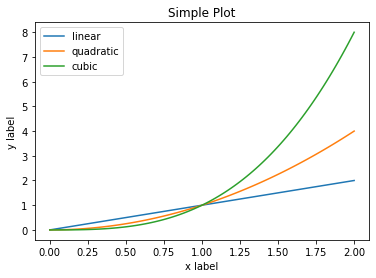

In [5]:
x = np.linspace(0, 2, 100)

# Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(x, x, label='linear')  # Plot some data on the axes.
ax.plot(x, x**2, label='quadratic')  # Plot more data on the axes...
ax.plot(x, x**3, label='cubic')  # ... and some more.
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend()  # Add a legend.

or (pyplot-style)



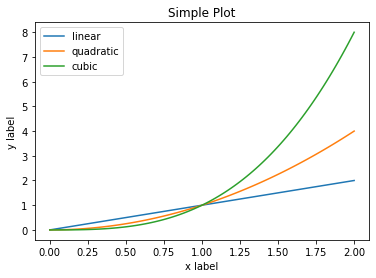

In [11]:
x = np.linspace(0, 2, 100)

plt.plot(x, x, label='linear')  # Plot some data on the (implicit) axes.
plt.plot(x, x**2, label='quadratic')  # etc.
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend()

Actually there is a third approach, for the case where you are embedding
Matplotlib in a GUI application, which completely drops pyplot, even for
figure creation.  We won't discuss it here; see the corresponding section in
the gallery for more info (`user_interfaces`).

Matplotlib's documentation and examples use both the OO and the pyplot
approaches (which are equally powerful), and you should feel free to use
either (however, it is preferable pick one of them and stick to it, instead
of mixing them).  In general, we suggest to restrict pyplot to interactive
plotting (e.g., in a Jupyter notebook), and to prefer the OO-style for
non-interactive plotting (in functions and scripts that are intended to be
reused as part of a larger project).

<div class="alert alert-info"><h4>Note</h4><p>In older examples, you may find examples that instead used the so-called
   ``pylab`` interface, via ``from pylab import *``. This star-import
   imports everything both from pyplot and from :mod:`numpy`, so that one
   could do ::

      x = linspace(0, 2, 100)
      plot(x, x, label='linear')
      ...

   for an even more MATLAB-like style.  This approach is strongly discouraged
   nowadays and deprecated; it is only mentioned here because you may still
   encounter it in the wild.</p></div>

Typically one finds oneself making the same plots over and over
again, but with different data sets, which leads to needing to write
specialized functions to do the plotting.  The recommended function
signature is something like:



In [7]:
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph

    Parameters
    ----------
    ax : Axes
        The axes to draw to

    data1 : array
       The x data

    data2 : array
       The y data

    param_dict : dict
       Dictionary of kwargs to pass to ax.plot

    Returns
    -------
    out : list
        list of artists added
    """
    out = ax.plot(data1, data2, **param_dict)
    return out

which you would then use as:



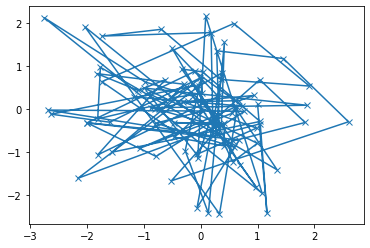

In [8]:
data1, data2, data3, data4 = np.random.randn(4, 100)
fig, ax = plt.subplots(1, 1)
my_plotter(ax, data1, data2, {'marker': 'x'})

or if you wanted to have 2 sub-plots:



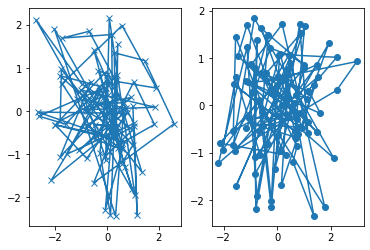

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2)
my_plotter(ax1, data1, data2, {'marker': 'x'})
my_plotter(ax2, data3, data4, {'marker': 'o'})

For these simple examples this style seems like overkill, however
once the graphs get slightly more complex it pays off.



Backends
========


What is a backend?
------------------

A lot of documentation on the website and in the mailing lists refers
to the "backend" and many new users are confused by this term.
matplotlib targets many different use cases and output formats.  Some
people use matplotlib interactively from the python shell and have
plotting windows pop up when they type commands.  Some people run
`Jupyter <https://jupyter.org>`_ notebooks and draw inline plots for
quick data analysis. Others embed matplotlib into graphical user
interfaces like wxpython or pygtk to build rich applications.  Some
people use matplotlib in batch scripts to generate postscript images
from numerical simulations, and still others run web application
servers to dynamically serve up graphs.

To support all of these use cases, matplotlib can target different
outputs, and each of these capabilities is called a backend; the
"frontend" is the user facing code, i.e., the plotting code, whereas the
"backend" does all the hard work behind-the-scenes to make the figure.
There are two types of backends: user interface backends (for use in
pygtk, wxpython, tkinter, qt4, or macosx; also referred to as
"interactive backends") and hardcopy backends to make image files
(PNG, SVG, PDF, PS; also referred to as "non-interactive backends").

Selecting a backend
-------------------

There are three ways to configure your backend:

1. The :rc:`backend` parameter in your :file:`matplotlibrc` file
2. The :envvar:`MPLBACKEND` environment variable
3. The function :func:`matplotlib.use`

A more detailed description is given below.

If multiple of these are configurations are present, the last one from the
list takes precedence; e.g. calling :func:`matplotlib.use()` will override
the setting in your :file:`matplotlibrc`.

If no backend is explicitly set, Matplotlib automatically detects a usable
backend based on what is available on your system and on whether a GUI event
loop is already running. On Linux, if the environment variable
:envvar:`DISPLAY` is unset, the "event loop" is identified as "headless",
which causes a fallback to a noninteractive backend (agg).

Here is a detailed description of the configuration methods:

#. Setting :rc:`backend` in your :file:`matplotlibrc` file::

       backend : qt5agg   # use pyqt5 with antigrain (agg) rendering

   See also :doc:`/tutorials/introductory/customizing`.

#. Setting the :envvar:`MPLBACKEND` environment variable:

   You can set the environment variable either for your current shell or for
   a single script.

   On Unix::

        > export MPLBACKEND=qt5agg
        > python simple_plot.py

        > MPLBACKEND=qt5agg python simple_plot.py

   On Windows, only the former is possible::

        > set MPLBACKEND=qt5agg
        > python simple_plot.py

   Setting this environment variable will override the ``backend`` parameter
   in *any* :file:`matplotlibrc`, even if there is a :file:`matplotlibrc` in
   your current working directory. Therefore, setting :envvar:`MPLBACKEND`
   globally, e.g. in your :file:`.bashrc` or :file:`.profile`, is discouraged
   as it might lead to counter-intuitive behavior.

#. If your script depends on a specific backend you can use the function
   :func:`matplotlib.use`::

      import matplotlib
      matplotlib.use('qt5agg')

   This should be done before any figure is created; otherwise Matplotlib may
   fail to switch the backend and raise an ImportError.

   Using `~matplotlib.use` will require changes in your code if users want to
   use a different backend.  Therefore, you should avoid explicitly calling
   `~matplotlib.use` unless absolutely necessary.


The builtin backends
--------------------

By default, Matplotlib should automatically select a default backend which
allows both interactive work and plotting from scripts, with output to the
screen and/or to a file, so at least initially you will not need to worry
about the backend.  The most common exception is if your Python distribution
comes without :mod:`tkinter` and you have no other GUI toolkit installed;
this happens on certain Linux distributions, where you need to install a
Linux package named ``python-tk`` (or similar).

If, however, you want to write graphical user interfaces, or a web
application server (`howto-webapp`), or need a better
understanding of what is going on, read on. To make things a little
more customizable for graphical user interfaces, matplotlib separates
the concept of the renderer (the thing that actually does the drawing)
from the canvas (the place where the drawing goes).  The canonical
renderer for user interfaces is ``Agg`` which uses the `Anti-Grain
Geometry`_ C++ library to make a raster (pixel) image of the figure; it
is used by the ``Qt5Agg``, ``Qt4Agg``, ``GTK3Agg``, ``wxAgg``, ``TkAgg``, and
``macosx`` backends.  An alternative renderer is based on the Cairo library,
used by ``Qt5Cairo``, ``Qt4Cairo``, etc.

For the rendering engines, one can also distinguish between `vector
<https://en.wikipedia.org/wiki/Vector_graphics>`_ or `raster
<https://en.wikipedia.org/wiki/Raster_graphics>`_ renderers.  Vector
graphics languages issue drawing commands like "draw a line from this
point to this point" and hence are scale free, and raster backends
generate a pixel representation of the line whose accuracy depends on a
DPI setting.

Here is a summary of the matplotlib renderers (there is an eponymous
backend for each; these are *non-interactive backends*, capable of
writing to a file):

========  =========  =======================================================
Renderer  Filetypes  Description
========  =========  =======================================================
AGG       png        raster_ graphics -- high quality images using the
                     `Anti-Grain Geometry`_ engine
PDF       pdf        vector_ graphics -- `Portable Document Format`_
PS        ps, eps    vector_ graphics -- Postscript_ output
SVG       svg        vector_ graphics -- `Scalable Vector Graphics`_
PGF       pgf, pdf   vector_ graphics -- using the pgf_ package
Cairo     png, ps,   raster_ or vector_ graphics -- using the Cairo_ library
          pdf, svg
========  =========  =======================================================

To save plots using the non-interactive backends, use the
``matplotlib.pyplot.savefig('filename')`` method.

And here are the user interfaces and renderer combinations supported;
these are *interactive backends*, capable of displaying to the screen
and of using appropriate renderers from the table above to write to
a file:

========= ================================================================
Backend   Description
========= ================================================================
Qt5Agg    Agg rendering in a :term:`Qt5` canvas (requires PyQt5_).  This
          backend can be activated in IPython with ``%matplotlib qt5``.
ipympl    Agg rendering embedded in a Jupyter widget.  (requires ipympl).
          This backend can be enabled in a Jupyter notebook with
          ``%matplotlib ipympl``.
GTK3Agg   Agg rendering to a :term:`GTK` 3.x canvas (requires PyGObject_,
          and pycairo_ or cairocffi_).  This backend can be activated in
          IPython with ``%matplotlib gtk3``.
macosx    Agg rendering into a Cocoa canvas in OSX.  This backend can be
          activated in IPython with ``%matplotlib osx``.
TkAgg     Agg rendering to a :term:`Tk` canvas (requires TkInter_). This
          backend can be activated in IPython with ``%matplotlib tk``.
nbAgg     Embed an interactive figure in a Jupyter classic notebook.  This
          backend can be enabled in Jupyter notebooks via
          ``%matplotlib notebook``.
WebAgg    On ``show()`` will start a tornado server with an interactive
          figure.
GTK3Cairo Cairo rendering to a :term:`GTK` 3.x canvas (requires PyGObject_,
          and pycairo_ or cairocffi_).
Qt4Agg    Agg rendering to a :term:`Qt4` canvas (requires PyQt4_ or
          ``pyside``).  This backend can be activated in IPython with
          ``%matplotlib qt4``.
wxAgg     Agg rendering to a :term:`wxWidgets` canvas (requires wxPython_ 4).
          This backend can be activated in IPython with ``%matplotlib wx``.
========= ================================================================

<div class="alert alert-info"><h4>Note</h4><p>The names of builtin backends case-insensitive; e.g., 'Qt5Agg' and
   'qt5agg' are equivalent.</p></div>


ipympl
^^^^^^

The Jupyter widget ecosystem is moving too fast to support directly in
Matplotlib.  To install ipympl

.. code-block:: bash

   pip install ipympl
   jupyter nbextension enable --py --sys-prefix ipympl

or

.. code-block:: bash

   conda install ipympl -c conda-forge

See `jupyter-matplotlib <https://github.com/matplotlib/jupyter-matplotlib>`__
for more details.


How do I select PyQt4 or PySide?
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

The :envvar:`QT_API` environment variable can be set to either ``pyqt`` or
``pyside`` to use ``PyQt4`` or ``PySide``, respectively.

Since the default value for the bindings to be used is ``PyQt4``, Matplotlib
first tries to import it, if the import fails, it tries to import ``PySide``.

Using non-builtin backends
--------------------------
More generally, any importable backend can be selected by using any of the
methods above. If ``name.of.the.backend`` is the module containing the
backend, use ``module://name.of.the.backend`` as the backend name, e.g.
``matplotlib.use('module://name.of.the.backend')``.



What is interactive mode?
=========================

Use of an interactive backend (see `what-is-a-backend`)
permits--but does not by itself require or ensure--plotting
to the screen.  Whether and when plotting to the screen occurs,
and whether a script or shell session continues after a plot
is drawn on the screen, depends on the functions and methods
that are called, and on a state variable that determines whether
matplotlib is in "interactive mode".  The default Boolean value is set
by the :file:`matplotlibrc` file, and may be customized like any other
configuration parameter (see :doc:`/tutorials/introductory/customizing`).  It
may also be set via :func:`matplotlib.interactive`, and its
value may be queried via :func:`matplotlib.is_interactive`.  Turning
interactive mode on and off in the middle of a stream of plotting
commands, whether in a script or in a shell, is rarely needed
and potentially confusing, so in the following we will assume all
plotting is done with interactive mode either on or off.

<div class="alert alert-info"><h4>Note</h4><p>Major changes related to interactivity, and in particular the
   role and behavior of :func:`~matplotlib.pyplot.show`, were made in the
   transition to matplotlib version 1.0, and bugs were fixed in
   1.0.1.  Here we describe the version 1.0.1 behavior for the
   primary interactive backends, with the partial exception of
   *macosx*.</p></div>

Interactive mode may also be turned on via :func:`matplotlib.pyplot.ion`,
and turned off via :func:`matplotlib.pyplot.ioff`.

<div class="alert alert-info"><h4>Note</h4><p>Interactive mode works with suitable backends in ipython and in
   the ordinary python shell, but it does *not* work in the IDLE IDE.
   If the default backend does not support interactivity, an interactive
   backend can be explicitly activated using any of the methods discussed
   in `What is a backend?`_.</p></div>


Interactive example
--------------------

From an ordinary python prompt, or after invoking ipython with no options,
try this::

    import matplotlib.pyplot as plt
    plt.ion()
    plt.plot([1.6, 2.7])

This will pop up a plot window. Your terminal prompt will remain active, so
that you can type additional commands such as::

    plt.title("interactive test")
    plt.xlabel("index")

On most interactive backends, the figure window will also be updated if you
change it via the object-oriented interface. E.g. get a reference to the
`~matplotlib.axes.Axes` instance, and call a method of that instance::

    ax = plt.gca()
    ax.plot([3.1, 2.2])

If you are using certain backends (like ``macosx``), or an older version
of matplotlib, you may not see the new line added to the plot immediately.
In this case, you need to explicitly call :func:`~matplotlib.pyplot.draw`
in order to update the plot::

    plt.draw()


Non-interactive example
-----------------------

Start a fresh session as in the previous example, but now
turn interactive mode off::

    import matplotlib.pyplot as plt
    plt.ioff()
    plt.plot([1.6, 2.7])

Nothing happened--or at least nothing has shown up on the
screen (unless you are using *macosx* backend, which is
anomalous).  To make the plot appear, you need to do this::

    plt.show()

Now you see the plot, but your terminal command line is
unresponsive; `.pyplot.show()` *blocks* the input
of additional commands until you manually kill the plot
window.

What good is this--being forced to use a blocking function?
Suppose you need a script that plots the contents of a file
to the screen.  You want to look at that plot, and then end
the script.  Without some blocking command such as ``show()``, the
script would flash up the plot and then end immediately,
leaving nothing on the screen.

In addition, non-interactive mode delays all drawing until
``show()`` is called; this is more efficient than redrawing
the plot each time a line in the script adds a new feature.

Prior to version 1.0, ``show()`` generally could not be called
more than once in a single script (although sometimes one
could get away with it); for version 1.0.1 and above, this
restriction is lifted, so one can write a script like this::

    import numpy as np
    import matplotlib.pyplot as plt

    plt.ioff()
    for i in range(3):
        plt.plot(np.random.rand(10))
        plt.show()

which makes three plots, one at a time. I.e. the second plot will show up,
once the first plot is closed.

Summary
-------

In interactive mode, pyplot functions automatically draw
to the screen.

When plotting interactively, if using
object method calls in addition to pyplot functions, then
call :func:`~matplotlib.pyplot.draw` whenever you want to
refresh the plot.

Use non-interactive mode in scripts in which you want to
generate one or more figures and display them before ending
or generating a new set of figures.  In that case, use
:func:`~matplotlib.pyplot.show` to display the figure(s) and
to block execution until you have manually destroyed them.


Performance
===========

Whether exploring data in interactive mode or programmatically
saving lots of plots, rendering performance can be a painful
bottleneck in your pipeline. Matplotlib provides a couple
ways to greatly reduce rendering time at the cost of a slight
change (to a settable tolerance) in your plot's appearance.
The methods available to reduce rendering time depend on the
type of plot that is being created.

Line segment simplification
---------------------------

For plots that have line segments (e.g. typical line plots, outlines
of polygons, etc.), rendering performance can be controlled by
:rc:`path.simplify` and :rc:`path.simplify_threshold`, which
can be defined e.g. in the :file:`matplotlibrc` file (see
:doc:`/tutorials/introductory/customizing` for more information about
the :file:`matplotlibrc` file). :rc:`path.simplify` is a boolean
indicating whether or not line segments are simplified at all.
:rc:`path.simplify_threshold` controls how much line segments are simplified;
higher thresholds result in quicker rendering.

The following script will first display the data without any
simplification, and then display the same data with simplification.
Try interacting with both of them::

  import numpy as np
  import matplotlib.pyplot as plt
  import matplotlib as mpl

  # Setup, and create the data to plot
  y = np.random.rand(100000)
  y[50000:] *= 2
  y[np.geomspace(10, 50000, 400).astype(int)] = -1
  mpl.rcParams['path.simplify'] = True

  mpl.rcParams['path.simplify_threshold'] = 0.0
  plt.plot(y)
  plt.show()

  mpl.rcParams['path.simplify_threshold'] = 1.0
  plt.plot(y)
  plt.show()

Matplotlib currently defaults to a conservative simplification
threshold of ``1/9``. If you want to change your default settings
to use a different value, you can change your :file:`matplotlibrc`
file.  Alternatively, you could create a new style for
interactive plotting (with maximal simplification) and another
style for publication quality plotting (with minimal
simplification) and activate them as necessary. See
:doc:`/tutorials/introductory/customizing` for
instructions on how to perform these actions.

The simplification works by iteratively merging line segments
into a single vector until the next line segment's perpendicular
distance to the vector (measured in display-coordinate space)
is greater than the ``path.simplify_threshold`` parameter.

<div class="alert alert-info"><h4>Note</h4><p>Changes related to how line segments are simplified were made
  in version 2.1. Rendering time will still be improved by these
  parameters prior to 2.1, but rendering time for some kinds of
  data will be vastly improved in versions 2.1 and greater.</p></div>

Marker simplification
---------------------

Markers can also be simplified, albeit less robustly than
line segments. Marker simplification is only available
to :class:`~matplotlib.lines.Line2D` objects (through the
``markevery`` property). Wherever
:class:`~matplotlib.lines.Line2D` construction parameters
are passed through, such as
:func:`matplotlib.pyplot.plot` and
:meth:`matplotlib.axes.Axes.plot`, the ``markevery``
parameter can be used::

  plt.plot(x, y, markevery=10)

The markevery argument allows for naive subsampling, or an
attempt at evenly spaced (along the *x* axis) sampling. See the
:doc:`/gallery/lines_bars_and_markers/markevery_demo`
for more information.

Splitting lines into smaller chunks
-----------------------------------

If you are using the Agg backend (see `what-is-a-backend`),
then you can make use of :rc:`agg.path.chunksize`
This allows you to specify a chunk size, and any lines with
greater than that many vertices will be split into multiple
lines, each of which has no more than ``agg.path.chunksize``
many vertices. (Unless ``agg.path.chunksize`` is zero, in
which case there is no chunking.) For some kind of data,
chunking the line up into reasonable sizes can greatly
decrease rendering time.

The following script will first display the data without any
chunk size restriction, and then display the same data with
a chunk size of 10,000. The difference can best be seen when
the figures are large, try maximizing the GUI and then
interacting with them::

  import numpy as np
  import matplotlib.pyplot as plt
  import matplotlib as mpl
  mpl.rcParams['path.simplify_threshold'] = 1.0

  # Setup, and create the data to plot
  y = np.random.rand(100000)
  y[50000:] *= 2
  y[np.geomspace(10, 50000, 400).astype(int)] = -1
  mpl.rcParams['path.simplify'] = True

  mpl.rcParams['agg.path.chunksize'] = 0
  plt.plot(y)
  plt.show()

  mpl.rcParams['agg.path.chunksize'] = 10000
  plt.plot(y)
  plt.show()

Legends
-------

The default legend behavior for axes attempts to find the location
that covers the fewest data points (``loc='best'``). This can be a
very expensive computation if there are lots of data points. In
this case, you may want to provide a specific location.

Using the *fast* style
----------------------

The *fast* style can be used to automatically set
simplification and chunking parameters to reasonable
settings to speed up plotting large amounts of data.
It can be used simply by running::

  import matplotlib.style as mplstyle
  mplstyle.use('fast')

It is very light weight, so it plays nicely with other
styles, just make sure the fast style is applied last
so that other styles do not overwrite the settings::

  mplstyle.use(['dark_background', 'ggplot', 'fast'])

